In [1]:
import tensorflow.keras as keras
import matplotlib
import numpy as np

2024-09-13 13:31:08.444883: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-13 13:31:08.641943: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-13 13:31:09.889977: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-13 13:31:12.932419: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils

import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
x_train.max()

255

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

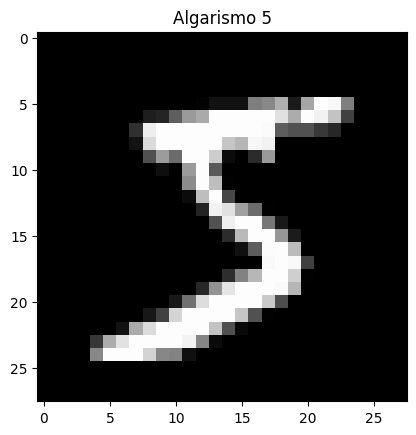

In [7]:
plt.imshow(x_train[0], cmap='gray')
plt.title('Algarismo ' + str(y_train[0]));

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [9]:
x_train = x_train.astype('float32')

In [10]:
x_test = (x_test.reshape(x_test.shape[0], 28, 28, 1)).astype('float32')

In [11]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
x_train /= 255
x_test /= 255

In [13]:
x_train.max(), x_train.min()

(1.0, 0.0)

In [14]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## **Rede Neural**

In [31]:
network = Sequential()
network.add(InputLayer(shape=x_train.shape[1:]))
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Flatten())
network.add(Dense(units=128, activation='relu'))
network.add(Dense(units=10, activation='softmax'))

In [32]:
network.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
network.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


2024-09-12 15:58:07.906010: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9826 - loss: 0.0627

2024-09-12 15:58:43.260187: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9826 - loss: 0.0627 - val_accuracy: 0.9814 - val_loss: 0.0545
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.9884 - loss: 0.0403 - val_accuracy: 0.9822 - val_loss: 0.0482
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.9916 - loss: 0.0277 - val_accuracy: 0.9866 - val_loss: 0.0404
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9942 - loss: 0.0208 - val_accuracy: 0.9851 - val_loss: 0.0534
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9950 - loss: 0.0169 - val_accuracy: 0.9864 - val_loss: 0.0389


In [37]:
results = network.evaluate(x_test, y_test)
results

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9830 - loss: 0.0465


[0.03887568786740303, 0.9864000082015991]

### **Melhorias**

In [15]:
network = Sequential()

network.add(InputLayer(shape=x_train.shape[1:]))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units=128, activation='relu'))
network.add(Dropout(0.2))

network.add(Dense(units=128, activation='relu'))
network.add(Dropout(0.2))

network.add(Dense(units=10, activation='softmax'))

In [16]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [17]:
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
network.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

2024-09-13 15:37:03.437397: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.8554 - loss: 0.4597

2024-09-13 15:39:02.932452: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 118s 207ms/step - accuracy: 0.8555 - loss: 0.4591 - val_accuracy: 0.9672 - val_loss: 0.1154
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 100s 118ms/step - accuracy: 0.9808 - loss: 0.0670 - val_accuracy: 0.9889 - val_loss: 0.0338
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 192ms/step - accuracy: 0.9859 - loss: 0.0469 - val_accuracy: 0.9876 - val_loss: 0.0406
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 123ms/step - accuracy: 0.9893 - loss: 0.0351 - val_accuracy: 0.9903 - val_loss: 0.0324
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 132ms/step - accuracy: 0.9912 - loss: 0.0284 - val_accuracy: 0.9876 - val_loss: 0.0452


In [19]:
network.evaluate(x_test, y_test)

2024-09-13 15:46:42.046370: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9833 - loss: 0.0597


[0.04523274302482605, 0.9876000285148621]

## **Cross Validation**